# Deep Neural Networks - Backpropagation - PyTorch
Compiled by Sneha Gupta, Shobhit Trehan and Charles Deledalle from PyTorch tutorials.  
Adapted by AurÃ©lie Bugeau and MichaÃ«l ClÃ©ment

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import math

## 1. Implementing a first neural network with NumPy

The objective is to learn the binary XOR function with a neural network.

As seen in class, a neural network with only one layer cannot predict the XOR function. It has no hidden layer and can therefore only classify linearly separable sets.

However the Universal Approximation Theorem states that a 2-layer neural network (with non-linear activation functions) can approximate any function.

The training set for the XOR function is defined as follows:

In [56]:
# Each data point in the XOR dataset has two variables (or features), x1 and x2, that can be either 0 or 1
# The label is their XOR combination, i.e. 1 if only x1 or only x2 is 1 while the other is 0. # If x1=x2, the label is 0.
n_samples = 500
x_train = np.random.randint(low=0, high=2, size=(n_samples, 2)).astype('float32') 
d_train = (np.sum(x_train, 1) == 1).astype('int')

# To make it slightly more challenging, we add a bit of gaussian noise to the data points.
std = 0.1
x_train += std * np.random.randn(n_samples, 2)
x_train = x_train.T

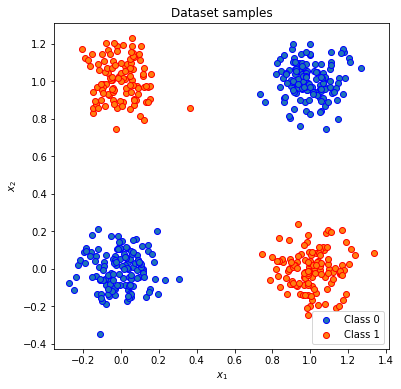

In [57]:
def visualize_samples(data, labels):
    ind0 = np.where(labels == 0)[0]
    ind1 = np.where(labels == 1)[0]
    data0 = data[ind0, :]
    data1 = data[ind1, :]
    plt.figure(figsize=(6, 6))
    plt.scatter(data0[:, 0], data0[:, 1], edgecolor='b', label="Class 0")
    plt.scatter(data1[:, 0], data1[:, 1], edgecolor='r', label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

visualize_samples(x_train.T, d_train)

### **Question 1** - Defining the network

We will define a feedforward neural network with two layers: one hidden layer composed of two neurons, and one output layer with one neuron (for prediction).

The networks has the following weights and biases to be trained:
$(\mathbf{W}_1,~\mathbf{b}_1)$ for the hidden layer,
and $(\mathbf{W}_2,~\mathbf{b}_2)$ for the output layer.

What are their dimensions? Initialize them randomly.

In [58]:
# COMPLETE
w1 = np.random.rand(2,2)
w2 = np.random.rand(1,2)
b1 = np.random.rand(2,1)
b2 = np.random.rand()

### **Question 2** - Activation functions

The feed-forward algorithm works as follows:
1. Each neuron $i$ in the hidden layers $l$ receives the weighted sum of the input values:  $$a_i^l=\sum_j  h_j^{l-1} w_{ij}^l + b^l_i$$
2. Each neuron calculates an output by using an activation function $g_1$ (typically sigmoid or ReLU): $$h_i^l= g_1(a_i^l)$$ 
3. Each neuron $i$ in the output layer $K$ receives the weighted sum of the last hidden layer:  $$a_i^K =\sum_j  h_j^{K-1} w_{ij}^{K} + b^K_i$$
4.  The output layer neuron calculates an output by using possibly another activation function $g_2$ (depending on the application): $$y_i= g_2(a_i^K)$$

In case of classification, logistic activation functions such as sigmoid or softmax are usually used. For regression, a mean squared error (MSE) can be used.

Implement the linear, logistic sigmoid and ReLU functions, as well as their derivatives

In [59]:
# COMPLETE
def linear(a):
    return a
def linear_derivative(a):
    return 1
def relu(a):
    return np.max(a,0)
def relu_derivative(a):
    return a > 0
def sigmoid(a):
    return 1/(1+np.exp(-a))
def sigmoid_derivative(a):
    return np.exp(-a)/((1+np.exp(-a))**2)

You will be able to experiment with the different functions by modifying the following cell:

In [60]:
g1 = sigmoid
g2 = sigmoid
g1_derivative = sigmoid_derivative 
g2_derivative = sigmoid_derivative

### **Question 3** - Loss function

To learn the parameters of the network we must compute the total loss of the forward pass ${\cal L}({\mathbf{W}})$.

It is given after summing for each training sample $(\mathbf{x}, \mathbf{d})$ the individual loss $L(y(\mathbf{x}), \mathbf{d})$: $${\cal L}({\bf W})=\sum_{(\mathbf{x},\mathbf{d})\in T} L(y(\mathbf{x}), \mathbf{d}).$$
where $y(\mathbf{x})$ is the output of the network (prediction) and $\mathbf{d}$ is the ground truth label.

Different loss functions can be used, depending on the problem. Here we will use the cross-entropy loss: 
$$L(\mathbf{y}, \mathbf{d})= -\sum_i d_i\log (y_i)+ (1-d_i)\log(1-y_i)$$
and its derivative which will be used for backpropagation
$$\frac{\partial L(\mathbf{y}, \mathbf{d})}{\partial y_i} = -\frac{d_i}{y_i} + \frac{1 - d_i}{1 - y_i}$$

In [61]:
# COMPLETE
def crossentropy(y, d):
    # Return a scalar corresponding to the total loss
    return -(d*np.log(y)+(1-d)*np.log(1-y)).sum()
def crossentropy_derivative(y, d):
    # Return a vector of partial derivatives of the loss with respect to output units
    return (-d/y)+((1-d)/(1-y))

### **Question 4** - Training the neural network

The following function implements a forward pass of the 2-layer neural network and the iterative learning 

In [62]:
gamma = 0.01 # learning rate
n_epochs = 1500

for k in range(n_epochs):
 
    a1 = w1.dot(x_train) + b1
    h1 = g1(a1)
    a2 = w2.dot(h1) + b2
    y = g2(a2)
    
    # Error
    error = crossentropy(y, d_train)
    if k % 100 == 0:
        print("error = {:.4f}".format(error))

    # Backpropagation
    delta2 = g2_derivative(a2)*crossentropy_derivative(y, d_train)
    delta1 = g1_derivative(a1) * w2.T.dot(delta2)

    # gradient update
    w2 = w2 - gamma * delta2.dot(h1.T)
    b2 = b2 - gamma * delta2.sum(axis=1, keepdims=True)
    w1 = w1 - gamma * delta1.dot(x_train.T)
    b1 = b1 - gamma * delta1.sum(axis=1, keepdims=True)

error = 546.2196
error = 325.3062
error = 28.7564
error = 9.1360
error = 5.3288
error = 3.7412
error = 2.8749
error = 2.3309
error = 1.9580
error = 1.6868
error = 1.4808
error = 1.3191
error = 1.1889
error = 1.0818
error = 0.9922


### **Question 5** - Testing and decision boundary

To test the network, we will evaluate the results on a square [0,1]$\times$[0,1] grid. 
 Complete the forward pass  on the test data, visualise and analyse the result.

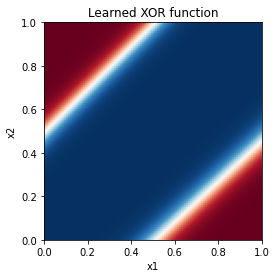

In [63]:
x_min, x_max = 0, 1
xx1, xx2 = np.meshgrid(np.arange(x_min, x_max, 0.01),
                       np.arange(x_min, x_max, 0.01))
x_test = np.array([xx1.ravel(), xx2.ravel()])

a1 = w1.dot(x_test) + b1
h1 = g1(a1)
a2 = w2.dot(h1) + b2
y_pred = g2(a2)
y_pred = y_pred.reshape(100,100)
plt.imshow(y_pred, cmap='RdBu', extent=[0, 1, 0, 1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Learned XOR function')
plt.show()

## 2. Introduction to PyTorch

PyTorch is a Python based scientific computing package targeted at two sets of audiences:
- a replacement for NumPy to use the power of GPUs,
- a deep learning research platform that provides maximum flexibility and speed.

For more reading please visit http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

In [64]:
import torch

### 2.1 Tensors
Torch tensors are similar to NumPy ndarrays, with the addition being that they can also be used on a
GPU to accelerate computing. The documentation for tensors is available here http://pytorch.org/docs/stable/tensors.html

#### Construction

In [65]:
# Construct a 5x3 tensor and print it
x = torch.Tensor(5, 3)
print(x)
print(x.shape, x.dtype)

tensor([[-7.4016e+22,  4.5701e-41, -9.3928e+22],
        [ 4.5701e-41, -2.7636e+11,  4.5699e-41],
        [-9.3274e+22,  4.5701e-41, -9.4809e+22],
        [ 4.5701e-41, -8.5520e+22,  4.5701e-41],
        [-2.7611e+11,  4.5699e-41, -8.9747e+22]])
torch.Size([5, 3]) torch.float32


In [66]:
# Construct a randomly initialized matrix 
# where each entry is a random number pulled from a uniform distribution from 0 to 1
y = torch.rand(5, 3)
print(y)
print(y.shape, y.dtype)

tensor([[0.1212, 0.6235, 0.1294],
        [0.0427, 0.6619, 0.3189],
        [0.7678, 0.7349, 0.6882],
        [0.3799, 0.8465, 0.7903],
        [0.5019, 0.0320, 0.2299]])
torch.Size([5, 3]) torch.float32


In [67]:
# Conversions
y = y.double()
print(y, y.dtype)

tensor([[0.1212, 0.6235, 0.1294],
        [0.0427, 0.6619, 0.3189],
        [0.7678, 0.7349, 0.6882],
        [0.3799, 0.8465, 0.7903],
        [0.5019, 0.0320, 0.2299]], dtype=torch.float64) torch.float64


#### Concatenation

In [68]:
# You can also initialize tensors directly with predefined values
x = torch.Tensor([[-0.1859, 1.3970, 0.5236],
                  [ 2.3854, 0.0707, 2.1970],
                  [-0.3587, 1.2359, 1.8951],
                  [-0.1189, -0.1376, 0.4647],
                  [-1.8968, 2.0164, 0.1092]])
y = torch.Tensor([[ 0.4838, 0.5822, 0.2755],
                  [ 1.0982, 0.4932, -0.6680],
                  [ 0.7915, 0.6580, -0.5819],
                  [ 0.3825, -1.1822, 1.5217],
                  [ 0.6042, -0.2280, 1.3210]])
print(x.shape, y.shape)

torch.Size([5, 3]) torch.Size([5, 3])


In [69]:
# You can stack the two 2d tensors in a 3d tensor as
z = torch.stack((x, y))
print(z)
print(z.shape)

tensor([[[-0.1859,  1.3970,  0.5236],
         [ 2.3854,  0.0707,  2.1970],
         [-0.3587,  1.2359,  1.8951],
         [-0.1189, -0.1376,  0.4647],
         [-1.8968,  2.0164,  0.1092]],

        [[ 0.4838,  0.5822,  0.2755],
         [ 1.0982,  0.4932, -0.6680],
         [ 0.7915,  0.6580, -0.5819],
         [ 0.3825, -1.1822,  1.5217],
         [ 0.6042, -0.2280,  1.3210]]])
torch.Size([2, 5, 3])


In [70]:
# Concatenates in the given dimension
z2 = torch.cat((x, y), dim=0)
print(z2)
print(z2.shape)

tensor([[-0.1859,  1.3970,  0.5236],
        [ 2.3854,  0.0707,  2.1970],
        [-0.3587,  1.2359,  1.8951],
        [-0.1189, -0.1376,  0.4647],
        [-1.8968,  2.0164,  0.1092],
        [ 0.4838,  0.5822,  0.2755],
        [ 1.0982,  0.4932, -0.6680],
        [ 0.7915,  0.6580, -0.5819],
        [ 0.3825, -1.1822,  1.5217],
        [ 0.6042, -0.2280,  1.3210]])
torch.Size([10, 3])


#### Accessing elements

In [71]:
# You can use standard NumPy-like indexing
print(x[:, 1])

tensor([ 1.3970,  0.0707,  1.2359, -0.1376,  2.0164])


#### Operations

In [72]:
# Adding two tensors i
print('x+y = ', x + y)
print('torch.add(x, y) = ', torch.add(x, y))
print('x.add(y) = ', x.add(y))
torch.add(x, y, out=x)
print('torch.add(x, y, out=x) = ', x)

x+y =  tensor([[ 0.2979,  1.9792,  0.7991],
        [ 3.4836,  0.5639,  1.5290],
        [ 0.4328,  1.8939,  1.3132],
        [ 0.2636, -1.3198,  1.9864],
        [-1.2926,  1.7884,  1.4302]])
torch.add(x, y) =  tensor([[ 0.2979,  1.9792,  0.7991],
        [ 3.4836,  0.5639,  1.5290],
        [ 0.4328,  1.8939,  1.3132],
        [ 0.2636, -1.3198,  1.9864],
        [-1.2926,  1.7884,  1.4302]])
x.add(y) =  tensor([[ 0.2979,  1.9792,  0.7991],
        [ 3.4836,  0.5639,  1.5290],
        [ 0.4328,  1.8939,  1.3132],
        [ 0.2636, -1.3198,  1.9864],
        [-1.2926,  1.7884,  1.4302]])
torch.add(x, y, out=x) =  tensor([[ 0.2979,  1.9792,  0.7991],
        [ 3.4836,  0.5639,  1.5290],
        [ 0.4328,  1.8939,  1.3132],
        [ 0.2636, -1.3198,  1.9864],
        [-1.2926,  1.7884,  1.4302]])


In [73]:
# Reshape a tensor with torch.view
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8) # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


#### In-place operations

In [74]:
# Any operation that mutates a tensor in-place is post-fixed with an _. For example: 
x = torch.Tensor([[1, 2],
                  [3, 4]])
y = torch.Tensor([[-1, -2],
                  [-3, -4]])

print('x before=', x)
x.copy_(y)
print('x after copying y =', x)
x.t_() # will change x
print('x after transpose =', x)
print('y has not changed=', y)

x before= tensor([[1., 2.],
        [3., 4.]])
x after copying y = tensor([[-1., -2.],
        [-3., -4.]])
x after transpose = tensor([[-1., -3.],
        [-2., -4.]])
y has not changed= tensor([[-1., -2.],
        [-3., -4.]])


### **Question 6**

Generate 2 random tensors $x$ and $y$ of dimensions 10$\times$10 and 2$\times$100, respectively, resize them such
that the instruction `torch.mm(x, y)` performs a row vector by matrix multiplication resulting in a
row vector of dimensions 1$\times$ 2.

In [75]:
# COMPLETE
x = torch.rand(10,10)
y = torch.rand(2,100)
x = x.view(1,100)
y = y.view(100,2)
z = torch.mm(x,y)
print(z)
print(z.size())

tensor([[23.2690, 22.1362]])
torch.Size([1, 2])


### 2.2 NumPy arrays and PyTorch tensors

### **Question 7**

Analyze the following code. Do $a$ and $b$ share the same memory locations?

In [76]:
# Converting
#Yes they do,they share the same underlying storage
a = torch.ones(5)
print('a= ', a)
b = a.numpy()
print('b = ', b)
print(a.type(), type(b))

a=  tensor([1., 1., 1., 1., 1.])
b =  [1. 1. 1. 1. 1.]
torch.FloatTensor <class 'numpy.ndarray'>


Compare the effect of each of these three instructions separately

In [77]:
print("before:")
print('a = ',a)
print('b = ',b)
#We add 1 to the first element
a[0] += 1
print('after a[0] += 1:')
print('a = ',a)
print('b = ',b)
#We add 1 to all elements
a.add_(1)
print('after a.add_(1):')
print('a = ',a)
print('b = ',b)
#We add 1 to all elements
a += 1
print('after a += 1:')
print('a = ',a)
print('b = ',b)
#We affect a new tensor to a and his values are the values of a inceremented
a = a.add(1)
print('after a = a.add(1):')
print('a = ',a)
print('b = ',b)

before:
a =  tensor([1., 1., 1., 1., 1.])
b =  [1. 1. 1. 1. 1.]
after a[0] += 1:
a =  tensor([2., 1., 1., 1., 1.])
b =  [2. 1. 1. 1. 1.]
after a.add_(1):
a =  tensor([3., 2., 2., 2., 2.])
b =  [3. 2. 2. 2. 2.]
after a += 1:
a =  tensor([4., 3., 3., 3., 3.])
b =  [4. 3. 3. 3. 3.]
after a = a.add(1):
a =  tensor([5., 4., 4., 4., 4.])
b =  [4. 3. 3. 3. 3.]


Converting NumPy arrays to a Torch tensor

In [78]:
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


### 1.3 Running on GPU

Torch tensors can be moved onto GPU device's memory using `.to('cuda')` or `.cuda()` and back to CPU device with `.to('cpu')` or `.cpu()`.

Alternatively, a tensor can be directly allocated into the GPU using the device optional argument. 

In [79]:
# Use cuda if a GPU is available, otherwise stay on CPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

x = torch.randn(5, 3).to(device)
y = torch.randn(5, 3, device=device)
z = x + y

print(z.cpu().numpy())

cuda
[[-0.73030186  2.151998    3.7997627 ]
 [-0.26335973  1.5181575   1.0765872 ]
 [-0.5184741   1.0126271   2.146343  ]
 [-1.890584   -1.6761737   2.5319078 ]
 [ 1.8188636  -1.4246365  -0.7546815 ]]


Note that moving data from CPU to GPU is slow, so try to do all the computations in GPU, and transfer the data back to CPU once all computations have been performed.

Note also that newer versions of PyTorch come with more advanced tools for manipulating GPU/CPU devices.

## 3. Automatic differentiation - Backpropagation
A central feature in PyTorch is the `autograd` package. It provides tools performing automatic differentiation for all operations based on Torch tensors. This means that the gradients of such operations will not
require to be explicitly programmed. It uses a *define-by-run framework* that computes these gradients
dynamically during runtime. This is really useful to apply the backpropagation algorithm, since `autograd` will deduce
automatically from the succession of forward operations what are the corresponding backward updates.  

A Torch tensor stores a flag `requires_grad`. By default, this attribute is set to *False*. If you set it to *True*, autograd will track all operations where this Tensor is involved. Any other tensor resulting from operations involving this tensor will have its `requires_grad` attribute set to *True* automatically.
When you finish your computation you can call `.backward()` and have the gradients computed automatically for all these tensors.
The gradient for these tensors will be accumulated into the `.grad` attribute.

### **Question 8**
- Analyze the equation $$f(x) = f(x_1,x_2,x_3,x_4)=x_1+x_2+x_3+x_4$$ implemented below  

In [80]:
x = torch.ones(4, requires_grad=True)
f = x.sum()
print(x, f)

tensor([1., 1., 1., 1.], requires_grad=True) tensor(4., grad_fn=<SumBackward0>)


- Derive the partial derivatives for each $x_i$:
$$
\begin{align}\left(\nabla_x f(x)\right)_i &= \frac{\partial f(x_1,x_2,x_3,x_4)}{\partial x_i}\\
&= 1 \end{align}$$

- Compare your result with the *autograd* result:

In [81]:
f.backward() # That's it!
print(x.grad)

tensor([1., 1., 1., 1.])


- Same question for the following equation:

$$f(x) = f(x_1,x_2,x_3,x_4)=\frac{1}{4}\sum_i 3(x_i+2)^2$$ 
\begin{align}\left(\nabla_x f(x)\right)_i &= \frac{\partial f(x_1,x_2,x_3,x_4)}{\partial x_i}\\
&=\frac{6}{4}(x_i+2)=4.5\end{align}

In [82]:
x = torch.ones(2, 2, requires_grad=True)
y = x + 2
z = y * y * 3
f = z.mean()
f.backward() 
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


## 4. Implementing a neural network in PyTorch

Let us rewrite the XOR neural network with PyTorch, following the tutorial at: https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/tutorial2/Introduction_to_PyTorch.html

#### Dataset 
PyTorch provides some functionalities to load the training and test data efficiently. The data package defines two classes which are the standard interface for handling data in PyTorch: `data.Dataset`, and `data.DataLoader`. 

In [83]:
import torch.utils.data as data

The dataset class summarizes the basic functionality of a dataset. To define a dataset in PyTorch, we specify two functions: `__getitem__`, and `__len__`.  For the XOR dataset, we can define the dataset class as follows:

In [84]:
class XORDataset(data.Dataset):

    def __init__(self, n_samples, std=0.1):
        """
        Inputs:
            n_samples - Number of data points we want to generate
            std - Standard deviation of the noise
        """
        super().__init__()
        self.n_samples = n_samples
        self.std = std
        # Generate data samples
        self.data = torch.randint(low=0, high=2, size=(self.n_samples, 2), dtype=torch.float32)
        self.labels = (self.data.sum(dim=1) == 1).to(torch.int)
        self.data += self.std * torch.randn(self.data.shape)

    def __len__(self):
        # Number of data points we have. Alternatively self.data.shape[0], or self.labels.shape[0]
        return self.n_samples

    def __getitem__(self, index):
        # Return the index-th data point of the dataset
        # If we have multiple things to return (data point and label), we can return them as tuple
        data_point = self.data[index]
        data_label = self.labels[index]
        return data_point, data_label

In [85]:
train_dataset = XORDataset(n_samples=500)
print(train_dataset.__len__())

500


### **Question 9**
What is the size of the dataset? What are the coordinates of the first point?

In [86]:
# COMPLETE
# We have 500 points in the dataset
# Coordinates of the first point
print(train_dataset.__getitem__(0))

(tensor([-0.0716,  0.9258]), tensor(1, dtype=torch.int32))


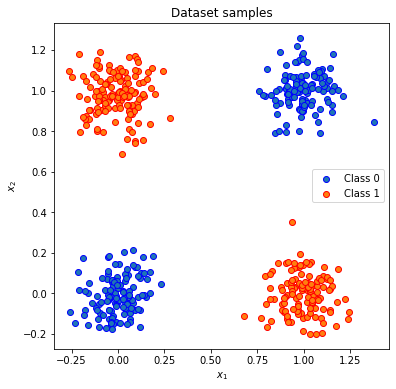

In [87]:
visualize_samples(train_dataset.data.numpy(), train_dataset.labels.numpy())
plt.show()

###  Batches
Let us now use the dataloader to handle batches 

In [88]:
print(train_dataset.data.shape)
data_loader = data.DataLoader(train_dataset, batch_size=4, shuffle=True)

# next(iter(...)) catches the first batch of the data loader
# If shuffle is True, it will randomly sample data from the dataset.
# For iterating over the whole dataset, we can simple use "for batch in data_loader: ..."
x_train_b, d_train_b = next(iter(data_loader))

# The shape of the outputs are [batch_size, d_1,...,d_N] where d_1,...,d_N are the
# dimensions of the data point returned from the dataset class
print("Data inputs", x_train_b.shape)
print("Data labels", d_train_b.shape)

torch.Size([500, 2])
Data inputs torch.Size([4, 2])
Data labels torch.Size([4])


### The network

The package `torch.nn` defines a series of useful classes like linear networks layers, activation functions, loss functions etc.

In [117]:
import torch.nn as nn

We define a 2-layers neural network with two neurons in the hidden layer. 
Each linear layer has a weight matrix of the shape `[output, input]`, and a bias of the shape `[output]`. The Sigmoid activation function does not have any parameters. 
There are two inputs neurons, representing the two coordinates of a data point.

In [118]:
class XORClassifier(nn.Module):

    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()
        # Initialize the modules we need to build the network
        self.linear1 = nn.Linear(num_inputs, num_hidden)
        self.act_fn = nn.Sigmoid()
        self.linear2 = nn.Linear(num_hidden, num_outputs)


    def forward(self, x):
        # Perform the calculation of the model to determine the prediction
        x = self.linear1(x)
        x = self.act_fn(x)
        x = self.linear2(x)
        return x
    
model = XORClassifier(num_inputs=2, num_hidden=2, num_outputs=1)
# Printing a module shows all its submodules
print(model)

XORClassifier(
  (linear1): Linear(in_features=2, out_features=2, bias=True)
  (act_fn): Sigmoid()
  (linear2): Linear(in_features=2, out_features=1, bias=True)
)


Print the model parameters :

In [119]:
for name, param in model.named_parameters():
    print("Parameter %s, shape %s" % (name, str(param.shape)))

Parameter linear1.weight, shape torch.Size([2, 2])
Parameter linear1.bias, shape torch.Size([2])
Parameter linear2.weight, shape torch.Size([1, 2])
Parameter linear2.bias, shape torch.Size([1])


### Loss
We again use the binary cross entropy loos

In [120]:
loss_fun = nn.BCEWithLogitsLoss()

### Optimizer
For updating the parameters, PyTorch provides the package `torch.optim` that has most popular optimizers implemented. Here, we use Stochastic Gradient Descent (SGD).

In [121]:
# Input to the optimizer are the parameters of the model: model.parameters()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

### Training
Let us now implement the training loop that performs the forward pass, calculates the loss, and apply backpropagation to update the weights. 

In [122]:
def train_model(model, optimizer, data_loader, loss_fun, num_epochs=200):
    # Set model to train mode
    model.train()

    # Training loop
    for epoch in range(num_epochs):
        for (data_inputs, data_labels) in data_loader:

            ## Step 1: Run the model on the input data
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]

            ## Step 2: Calculate the loss
            loss = loss_fun(preds, data_labels.float())

            ## Step 3: Perform backpropagation
            # Before calculating the gradients, we need to ensure that they are all zero.
            # Otherwise, the gradients would be accumulating to the previous ones.
            optimizer.zero_grad()
            # Perform backpropagation
            loss.backward()

            ## Step 4: Update the parameters
            optimizer.step()

In [123]:
train_model(model, optimizer, data_loader, loss_fun)

Show the learned parameters:

In [124]:
state_dict = model.state_dict()
print(state_dict)

OrderedDict([('linear1.weight', tensor([[-7.0584, -7.1822],
        [-5.6738, -5.6070]])), ('linear1.bias', tensor([3.2785, 8.3059])), ('linear2.weight', tensor([[-12.0505,  11.4670]])), ('linear2.bias', tensor([-5.2193]))])


### **Question 10** - Testing and decision boundary
Apply the network on a test set, an visualize the decision boundary

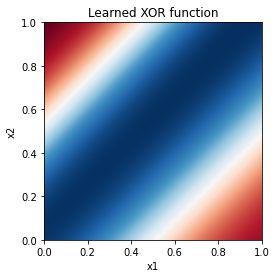

In [125]:
# COMPLETE
x_min, x_max = 0, 1
xx1, xx2 = torch.meshgrid(torch.arange(x_min, x_max, 0.01),
                       torch.arange(x_min, x_max, 0.01))
x_test = torch.stack([xx1.ravel(), xx2.ravel()],dim=-1)
x_test=x_test.reshape(10000,2)
predicted_labels = model(x_test)
predicted_labels = predicted_labels.squeeze(dim=1)
predicted_labels=predicted_labels.reshape(100,100)
plt.imshow(predicted_labels.detach().numpy(), cmap='RdBu', extent =[0, 1, 0, 1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Learned XOR function')
plt.show()